<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Contents:" data-toc-modified-id="Contents:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Contents:</a></span><ul class="toc-item"><li><span><a href="#1.-Introduction-to-Clustering" data-toc-modified-id="1.-Introduction-to-Clustering-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>1. Introduction to Clustering</a></span></li><li><span><a href="#2.-Hierarchical-Clustering" data-toc-modified-id="2.-Hierarchical-Clustering-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>2. Hierarchical Clustering</a></span></li><li><span><a href="#3.-K-Means-Clustering" data-toc-modified-id="3.-K-Means-Clustering-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>3. K-Means Clustering</a></span></li><li><span><a href="#4.-Clustering-in-Real-World" data-toc-modified-id="4.-Clustering-in-Real-World-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>4. Clustering in Real World</a></span></li></ul></li><li><span><a href="#1.-Introduction-to-Clustering" data-toc-modified-id="1.-Introduction-to-Clustering-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>1. Introduction to Clustering</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Example-2" data-toc-modified-id="Example-2-2.0.0.1"><span class="toc-item-num">2.0.0.1&nbsp;&nbsp;</span>Example 2</a></span></li><li><span><a href="#Fifa-Example" data-toc-modified-id="Fifa-Example-2.0.0.2"><span class="toc-item-num">2.0.0.2&nbsp;&nbsp;</span>Fifa Example</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#2.-Hierarchical-Clustering" data-toc-modified-id="2.-Hierarchical-Clustering-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>2. Hierarchical Clustering</a></span></li><li><span><a href="#3.-Kmeans" data-toc-modified-id="3.-Kmeans-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>3. Kmeans</a></span></li><li><span><a href="#4.-Clustering-in-Real-World" data-toc-modified-id="4.-Clustering-in-Real-World-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>4. Clustering in Real World</a></span></li></ul></div>

# Contents:

## 1. Introduction to Clustering
## 2. Hierarchical Clustering
## 3. K-Means Clustering
## 4. Clustering in Real World

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Importing data
fifa_data = pd.read_csv('./Data/fifa_18_dataset.csv')
fifa_sample = pd.read_csv('./Data/fifa_18_sample_data.csv')
movies = pd.read_csv('./Data/movies_plot.csv')

In [4]:
fifa_sample.columns

Index(['ID', 'name', 'full_name', 'club', 'club_logo', 'special', 'age',
       'league', 'birth_date', 'height_cm',
       ...
       'prefers_cb', 'prefers_lb', 'prefers_lwb', 'prefers_ls', 'prefers_lf',
       'prefers_lam', 'prefers_lcm', 'prefers_ldm', 'prefers_lcb',
       'prefers_gk'],
      dtype='object', length=185)

# 1. Introduction to Clustering

- The below code explains how whiten is used to normalize the data.
- Normalizing data makes the sdev as 1. The variance reduces but trend remains

` x_new = x/std_dev(x)`

In [79]:
# Import the whiten function
from scipy.cluster.vq import whiten

goals_for = [4,3,2,3,1,1,2,0,1,4]

# Use the whiten() function to standardize the data
scaled_data = whiten(goals_for)
print(scaled_data)

[3.07692308 2.30769231 1.53846154 2.30769231 0.76923077 0.76923077
 1.53846154 0.         0.76923077 3.07692308]


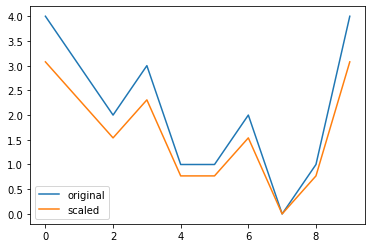

In [80]:
# Plot original data
plt.plot(goals_for, label='original')

# Plot scaled data
plt.plot(scaled_data, label='scaled')

# Show the legend in the plot
plt.legend()

# Display the plot
plt.show()

#### Example 2

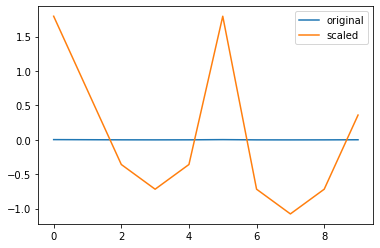

In [81]:
# Prepare data
rate_cuts = [0.0025, 0.001, -0.0005, -0.001, -0.0005, 0.0025, -0.001, -0.0015, -0.001, 0.0005]

# Use the whiten() function to standardize the data
scaled_data = whiten(rate_cuts)

# Plot original data
plt.plot(rate_cuts, label='original')

# Plot scaled data
plt.plot(scaled_data, label='scaled')

plt.legend()
plt.show()

#### Fifa Example 

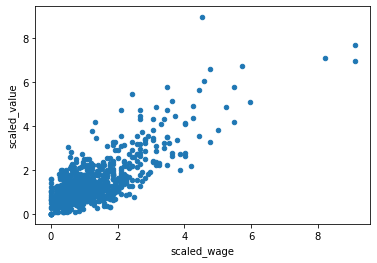

       scaled_wage  scaled_value
count  1000.000000   1000.000000
mean      1.119812      1.306272
std       1.000500      1.000500
min       0.000000      0.000000
25%       0.467717      0.730412
50%       0.854794      1.022576
75%       1.407184      1.542995
max       9.112425      8.984064


In [82]:
# Scale wage and value
fifa_sample['scaled_wage'] = whiten(fifa_sample['eur_wage'])
fifa_sample['scaled_value'] = whiten(fifa_sample['eur_value'])

# Plot the two columns in a scatter plot
fifa_sample.plot(x='scaled_wage', y='scaled_value', kind = 'scatter')
plt.show()

# Check mean and standard deviation of scaled values
print(fifa_sample[['scaled_wage', 'scaled_value']].describe())

- As you can see the scaled values have a standard deviation of 1.

# 2. Hierarchical Clustering

<img src = './Images/HC-1.png' width = 400 align = "left">

<img src = './Images/HC-2.png' width = 300 align = "left">

                scaled_sliding_tackle  scaled_aggression
cluster_labels                                          
1                            0.987373           1.849142
2                            3.013487           4.063492
3                            1.934455           3.210802


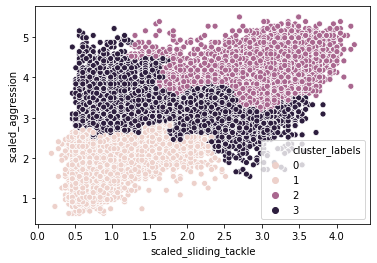

In [83]:
from scipy.cluster.hierarchy import dendrogram, fcluster, linkage
import matplotlib.pyplot as plt
import seaborn as sns

# Scale aggression and value
fifa_data['scaled_sliding_tackle'] = whiten(fifa_data['sliding_tackle'])
fifa_data['scaled_aggression'] = whiten(fifa_data['aggression'])

# Fit the data into a hierarchical clustering algorithm
distance_matrix = linkage(fifa_data[['scaled_sliding_tackle', 'scaled_aggression']], 'ward')

# Assign cluster labels to each row of data
fifa_data['cluster_labels'] = fcluster(distance_matrix, 3, criterion='maxclust')

# Display cluster centers of each cluster
print(fifa_data[['scaled_sliding_tackle', 'scaled_aggression', 'cluster_labels']].groupby('cluster_labels').mean())

# Create a scatter plot through seaborn
sns.scatterplot(x='scaled_sliding_tackle', y='scaled_aggression', hue='cluster_labels', data=fifa_data)
plt.show()

# 3. Kmeans

<img src = './Images/KM-5.png' width = 500 align = "left">

<img src = './Images/KM-6.png' width = 500 align = "left">

<img src = './Images/KM-7.png' width = 500 align = "left">

<img src = './Images/KM-8.png' width = 300 align = "left">

<img src = './Images/KM-9.png' width = 400 align = "left">

- Notice that kmeans is unable to capture the three visible clusters clearly, and the two clusters towards the top have taken in some points along the boundary. This happens due to the underlying assumption in kmeans algorithm to minimize distortions which leads to clusters that are similar in terms of area.

<img src = './Images/KM-10.png' width = 400 align = "left">

                scaled_def  scaled_phy
cluster_labels                        
0                 1.948298    7.163234
1                 3.817844    9.020452
2                 2.072803    9.066327


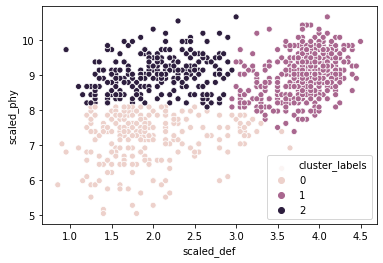

In [84]:
from numpy import random
from scipy.cluster.vq import kmeans, vq
# Set up a random seed in numpy
random.seed([1000,2000])

# Scale aggression and value
fifa_sample['scaled_def'] = whiten(fifa_sample['def'])
fifa_sample['scaled_phy'] = whiten(fifa_sample['phy'])

# Fit the data into a k-means algorithm
cluster_centers,_ = kmeans(fifa_sample[['scaled_def', 'scaled_phy']], 3)

# Assign cluster labels
fifa_sample['cluster_labels'], _ = vq(fifa_sample[['scaled_def', 'scaled_phy']], cluster_centers)

# Display cluster centers 
print(fifa_sample[['scaled_def', 'scaled_phy', 'cluster_labels']].groupby('cluster_labels').mean())

# Create a scatter plot through seaborn
sns.scatterplot(x='scaled_def', y='scaled_phy', hue='cluster_labels', data=fifa_sample)
plt.show()

# 4. Clustering in Real World

In [85]:
scaled_features = ['scaled_pac', 'scaled_sho', 'scaled_pas', 'scaled_dri', 'scaled_def', 'scaled_phy']
features = ['pac', 'sho', 'pas', 'dri', 'def', 'phy']

for i in range(0,len(scaled_features)):
    fifa_sample[scaled_features[i]] = whiten(fifa_sample[features[i]])

                scaled_pac  scaled_sho  scaled_pas  scaled_dri  scaled_def  \
cluster_labels                                                               
0                 6.684477    5.433653    8.456695    8.516572    2.496427   
1                 5.461627    3.673869    7.180554    6.775813    3.966748   

                scaled_phy  
cluster_labels              
0                 8.332794  
1                 9.206925  


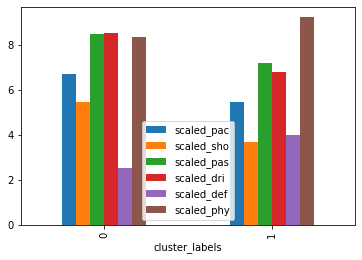

0 ['Cristiano Ronaldo' 'L. Messi' 'Neymar' 'L. Suárez' 'M. Neuer']
1 ['Sergio Ramos' 'G. Chiellini' 'L. Bonucci' 'J. Boateng' 'D. Godín']


In [86]:
# Create centroids with kmeans for 2 clusters
cluster_centers,_ = kmeans(fifa_sample[scaled_features], 2)

# Assign cluster labels and print cluster centers
fifa_sample['cluster_labels'], _ = vq(fifa_sample[scaled_features], cluster_centers)
print(fifa_sample.groupby('cluster_labels')[scaled_features].mean())

# Plot cluster centers to visualize clusters
fifa_sample.groupby('cluster_labels')[scaled_features].mean().plot(legend=True, kind='bar')
plt.show()

# Get the name column of top 5 players in each cluster
for cluster in fifa_sample['cluster_labels'].unique():
    print(cluster, fifa_sample[fifa_sample['cluster_labels'] == cluster]['name'].values[:5])